# Oasis Infobyte
# SALES PREDICTION USING PYTHON
# Task no. 5 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [28]:
df = pd.read_csv("C:/Users/hk982/Downloads/archive (5)/Advertising.csv ")

In [29]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [31]:
df.nunique()

Unnamed: 0    200
TV            190
Radio         167
Newspaper     172
Sales         121
dtype: int64

In [32]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [33]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [34]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

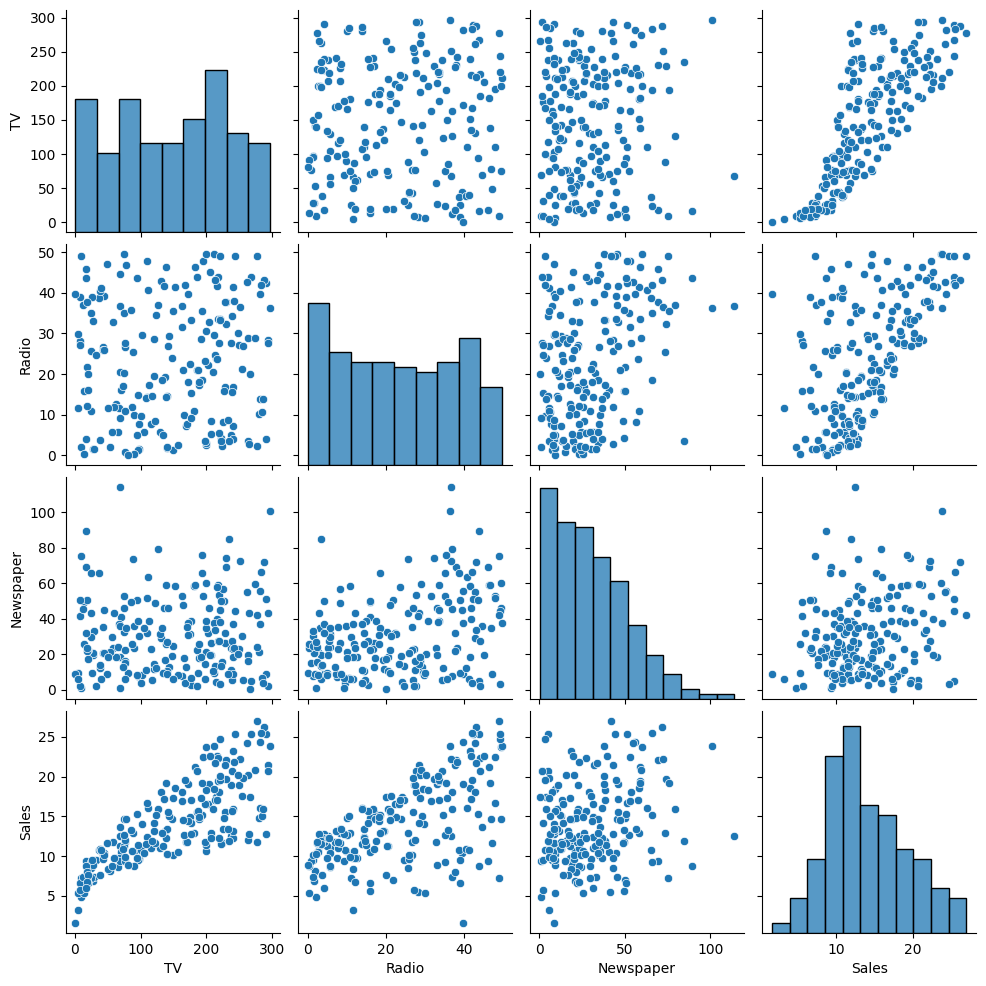

In [35]:
sns.pairplot(df)

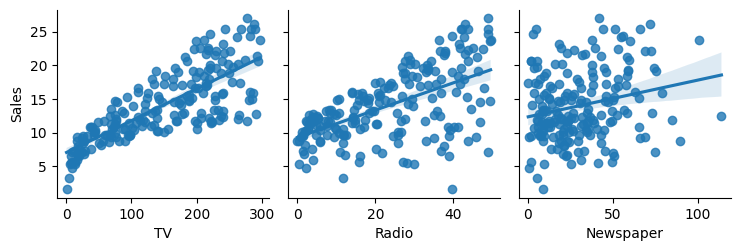

In [36]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='reg')

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

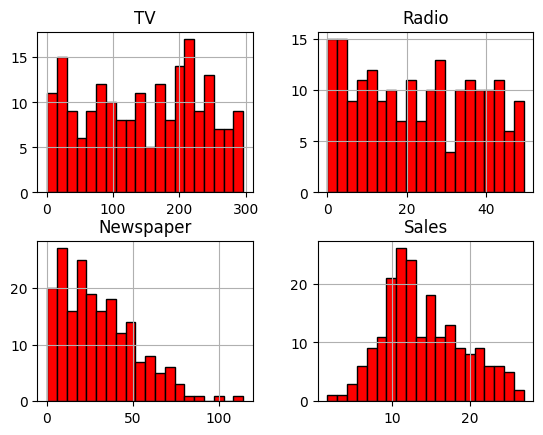

In [37]:
df.hist(bins=20, color='red', edgecolor='black')



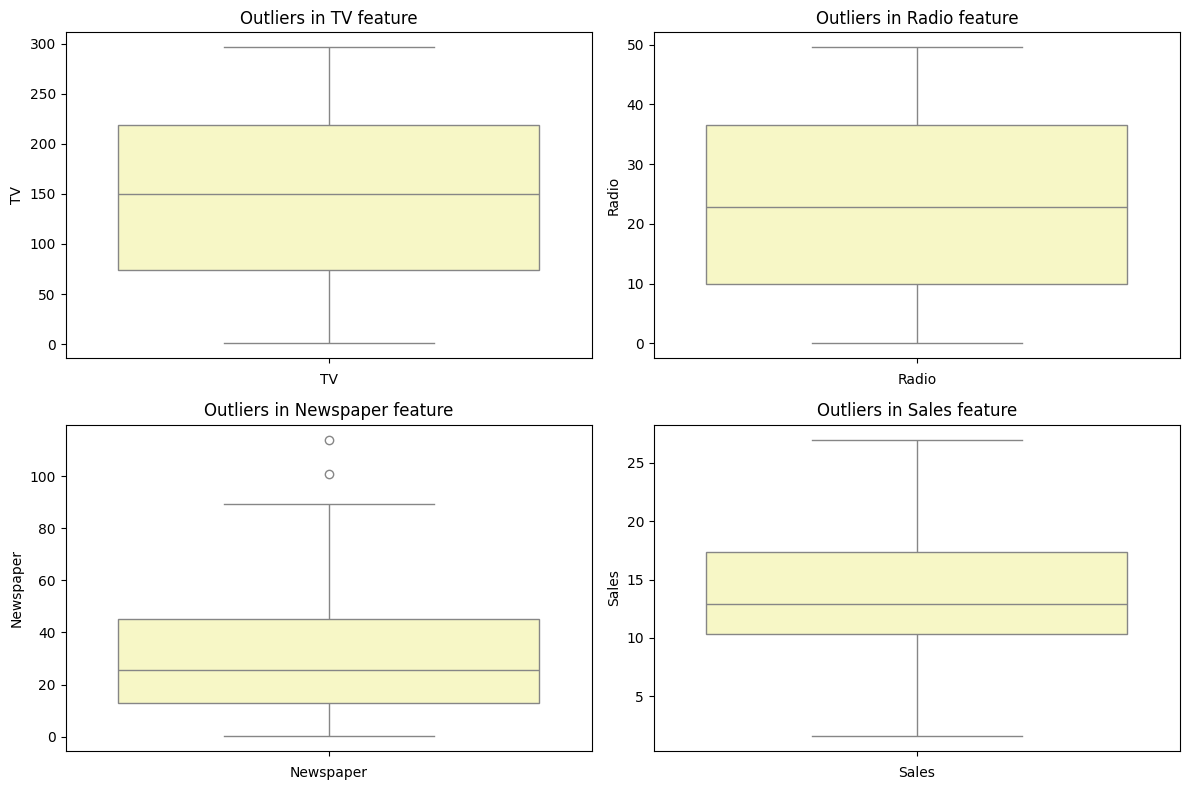

In [38]:
plt.figure(figsize=(12, 8))

columns = {0: "TV", 1: "Radio", 2: "Newspaper", 3: "Sales"}

for plot, col_name in columns.items():
    plt.subplot(2, 2, plot + 1)
    sns.boxplot(data=df[col_name],palette="Spectral")
    plt.xlabel(col_name)
    plt.title("Outliers in {} feature".format(col_name))

plt.tight_layout()
plt.show()

C:\Users\hk982\AppData\Local\Temp\ipykernel_7388\2273258663.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col_name],hist=False, label= col_name)
C:\Users\hk982\AppData\Local\Temp\ipykernel_7388\2273258663.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["Sale

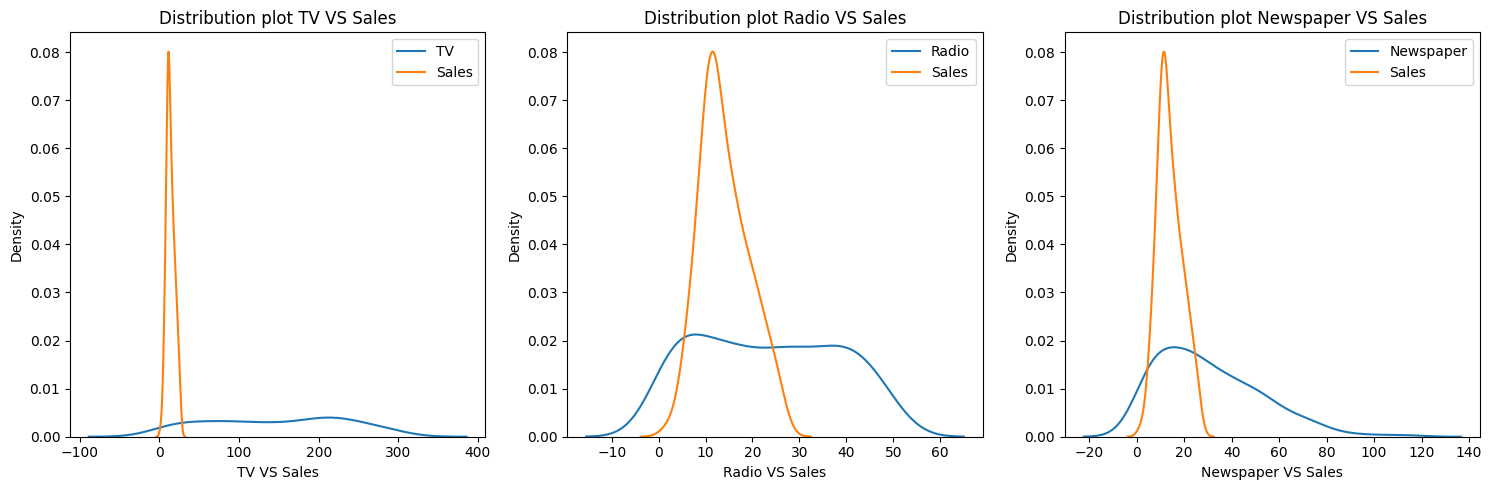

In [39]:
plt.figure(figsize=(15, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.distplot(x=df[col_name],hist=False, label= col_name)
    sns.distplot(x=df["Sales"],hist = False,label= "Sales")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Distribution plot {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()

In [41]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

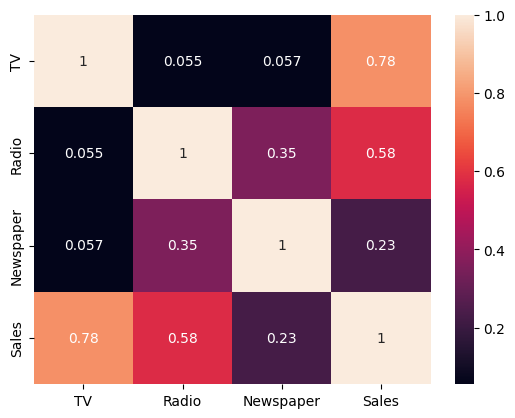

In [42]:
sns.heatmap(df.corr(),annot=True)

In [43]:
df_corr_sale=df.corr()['Sales'].to_frame()
df_corr_sale

,Sales
TV,0.782224
Radio,0.576223
Newspaper,0.228299
Sales,1.000000


<Axes: xlabel='None', ylabel='Sales'>

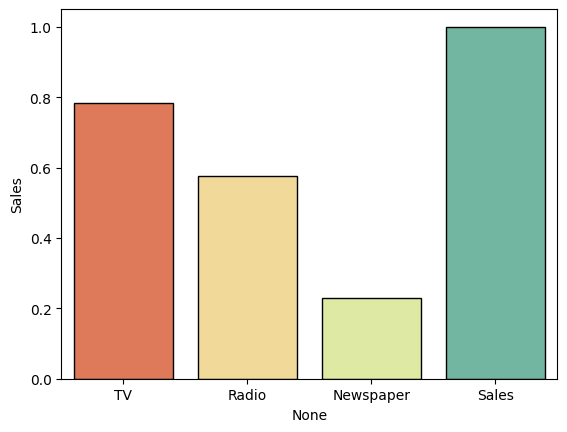

In [44]:
sns.barplot(data=df_corr_sale,x=df_corr_sale.index,y='Sales', palette="Spectral", edgecolor='black')

In [45]:
X = df.drop(columns="Sales",axis=1)
y=df["Sales"]

In [46]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler

le = LabelEncoder()
y= le.fit_transform(y)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
scaler = MinMaxScaler()
scaler.fit(X_train,y_train)

MinMaxScaler()

In [48]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso

models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso())
]

Linear Regression
Mean Squared Error: 108.8856394172908
R2 Score: 0.9137298616704539
Cross-Validation R2: 0.8829076766313095


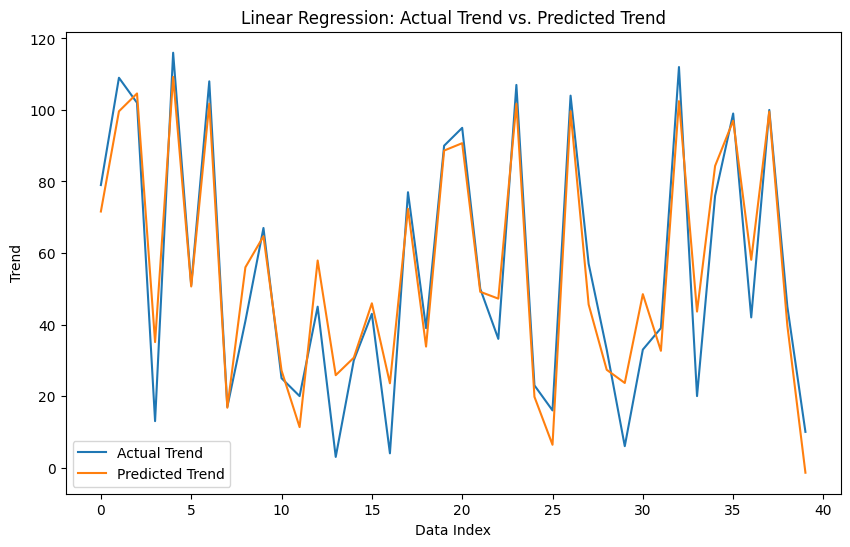


Ridge Regression
Mean Squared Error: 124.1655747427147
R2 Score: 0.9016235624261707
Cross-Validation R2: 0.8744917309227282


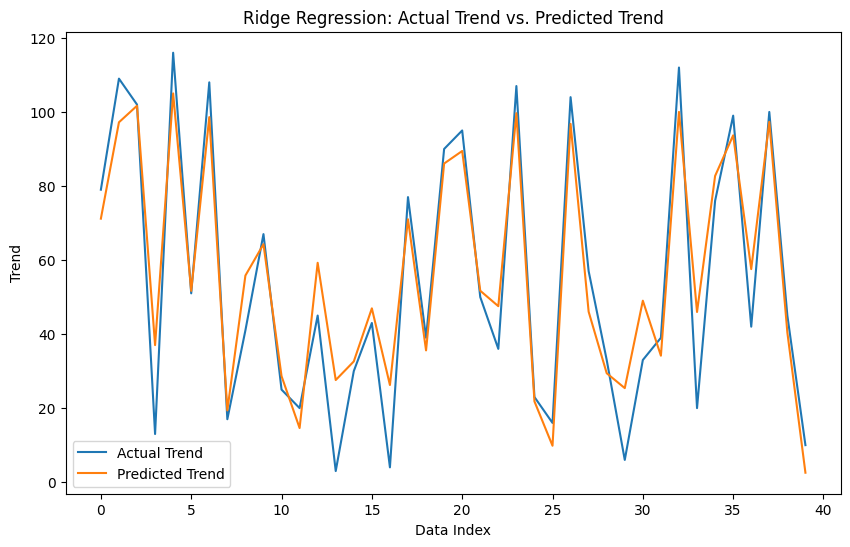


Lasso Regression
Mean Squared Error: 152.65126991931305
R2 Score: 0.8790543340462877
Cross-Validation R2: 0.8556271875371658


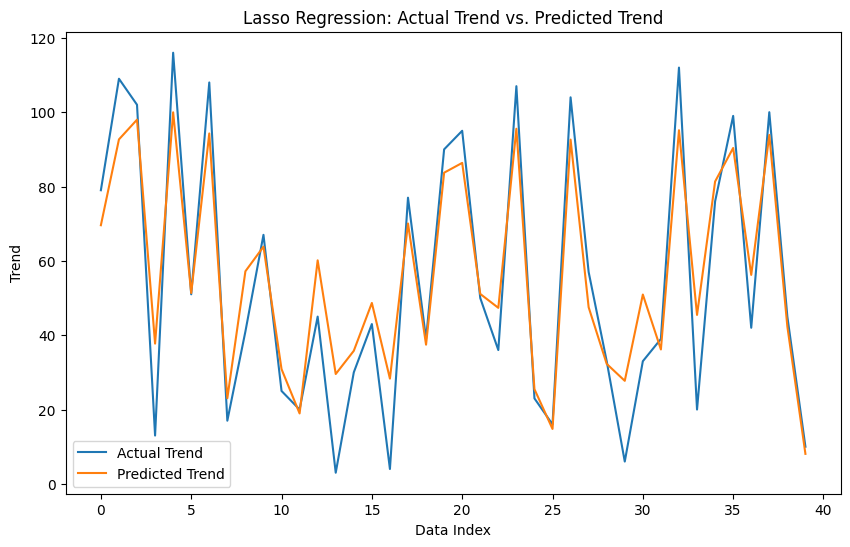

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

for name, model in models:
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    print("{}".format(name))
    print("Mean Squared Error: {}".format(mse))
    print("R2 Score: {}".format(r2))
    print("Cross-Validation R2: {}".format(cv_scores.mean()))
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    print()   

In [51]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
from termcolor import colored 
tv = float(input("Enter the TV value: "))
radio = float(input("Enter the Radio value: "))
news = float(input("Enter the Newspaper value: "))

new_data = pd.DataFrame({
    "TV": [tv],
    "Radio": [radio],
    "Newspaper": [news]
})

new_pred_scaled = scaler.transform(new_data)
print("-------------------------------------")
new_pred = lr.predict(new_pred_scaled)
print("Predicted Sales : {}".format(abs(new_pred)))

box_width = 40
predicted_sales = abs(new_pred[0])
formatted_sales = colored("Predicted Sales: {:.2f}".format(predicted_sales), color='white', attrs=['bold'])
box_line = "+" + "-" * (box_width - 2) + "+"

print("+" + "-"*30 + "+")
print("|{:^30}|".format("Predicted Sales"))
print("+" + "-"*30 + "+")
print("|{:^30.2f}|".format(abs(new_pred[0])))
print("+" + "-"*30 + "+")

Enter the TV value:  76
Enter the Radio value:  45
Enter the Newspaper value:  45


-------------------------------------
Predicted Sales : [9.51532675]
+------------------------------+
|       Predicted Sales        |
+------------------------------+
|             9.52             |
+------------------------------+


C:\Users\hk982\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Thanks